<a href="https://colab.research.google.com/github/urvog/incomesalary/blob/main/Unidad_II_Tema_7_Arboles_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema 7. Arboles de Decisión

<img src="https://www.neuraldojo.org/media/decision_tree.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>

##Ingresos $ de personas adultas

**Objetivo**
Predecir si los ingresos exceden los $50K/año según los datos del censo. También conocido como conjunto de datos de "Ingresos del censo".

>50K, <=50K.

Columnas:
- age: edad (continuous)
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, - State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

##Repasemos algunos conceptos

Los arboles de decisión en mathing learning, cubren tanto los problemas de clasificación como los de regresión, y ademas son fáciles de representar gráficamente. Los componentes de un árbol de decisión son:
- Nodo raíz: Representa todos los datos, siendo la primera partición que se realiza de dichos datos.
- División: Es la partición de un nodo en dos o más subnodos.
- Nodo: Son las divisiones producidas por las ramas que han surgido de los nodos anteriores.
- Hoja: Cuando un nodo ya no se puede dividir más se convierte en una hoja.
- Rama: Cuando se produce una decisión en un nodo, se producen ramas.

## 1.- Importando los datos

In [1]:
!wget https://neuraldojo.org/media/income/income.csv

--2022-03-02 15:56:29--  https://neuraldojo.org/media/income/income.csv
Resolving neuraldojo.org (neuraldojo.org)... 143.95.32.198
Connecting to neuraldojo.org (neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4578867 (4.4M) [text/csv]
Saving to: ‘income.csv’

income.csv          100%[===================>]   4.37M  13.2MB/s    in 0.3s    

2022-03-02 15:56:30 (13.2 MB/s) - ‘income.csv’ saved [4578867/4578867]



In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df_income = pd.read_csv('income.csv')

In [4]:
df_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [5]:
df_income.shape

(43957, 15)

##2.- Analysis Exploratorio de Datos (EDA)

In [6]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [7]:
df_income.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [8]:
df_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [9]:
#Verificamos la distribución de nuestra variable objetivo
df_income['income_>50K'].value_counts()

0    33439
1    10518
Name: income_>50K, dtype: int64

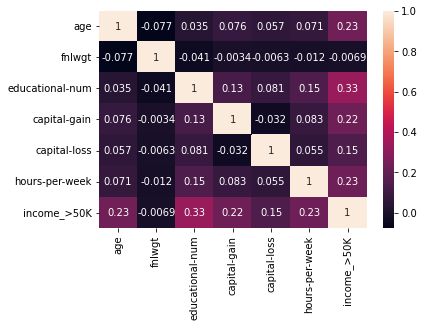

In [10]:
sns.heatmap(df_income.corr(), annot= True)

In [11]:
#One Hot Encoding para los atributos categóricos
df_income_onehot = pd.get_dummies(df_income)

In [12]:
df_income_onehot

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,17,244602,8,0,0,15,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,31,174201,13,0,0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,58,110199,4,0,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,25,149248,10,0,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
43953,19,116562,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
43954,30,197947,10,0,0,58,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
43955,46,97883,13,0,0,35,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
#Dividimos nuestros datos para entrenar el modelo (Train, Validation) y para Test
df_train_ = df_income_onehot.sample(frac= .80)
df_test = df_income_onehot.drop(df_train_.index)


In [14]:
#Dividimos nuesros datos train, validation and test
X = df_train_.drop('income_>50K', axis = 1)
y = df_train_['income_>50K']

X_test = df_test.drop('income_>50K', axis = 1)
y_test = df_test['income_>50K']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size = 0.3)


##3.- Modelado ML

###Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

##4.- Evaluamos

In [16]:
#Imprimimos Scores
print("Train Score:", clf_dt.score(X_train,y_train))
print("Validation Score:", clf_dt.score(X_valid,y_valid))
print("Test Score:", clf_dt.score(X_test,y_test))

Train Score: 0.9998781280467989
Validation Score: 0.8114691943127962
Test Score: 0.8157206233648049


##5.- Ajustamos Parametros

- **max_depth:** Controla la profundidad máxima del árbol de decisión. Si este parámetro no se define el árbol crecerá de forma indefinida hasta alcanzar el máximo nivel de pureza en cada split o hasta que cada split contenga un número de muestras igual a min_samples.

- **min_samples_split:** Número de muestras mínimo permitido para realizar la división de un dataset. Si al realizar la división el número de muestras es inferior a este parámetro el árbol descartaría el split.

In [17]:
clf_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf = 5)
clf_dt.fit(X_train, y_train)

#Imprimimos Scores
print("Train Score:", clf_dt.score(X_train,y_train))
print("Validation Score:", clf_dt.score(X_valid,y_valid))
print("Test Score:", clf_dt.score(X_test,y_test))

Train Score: 0.8540380240493988
Validation Score: 0.8498578199052133
Test Score: 0.8510977135706973


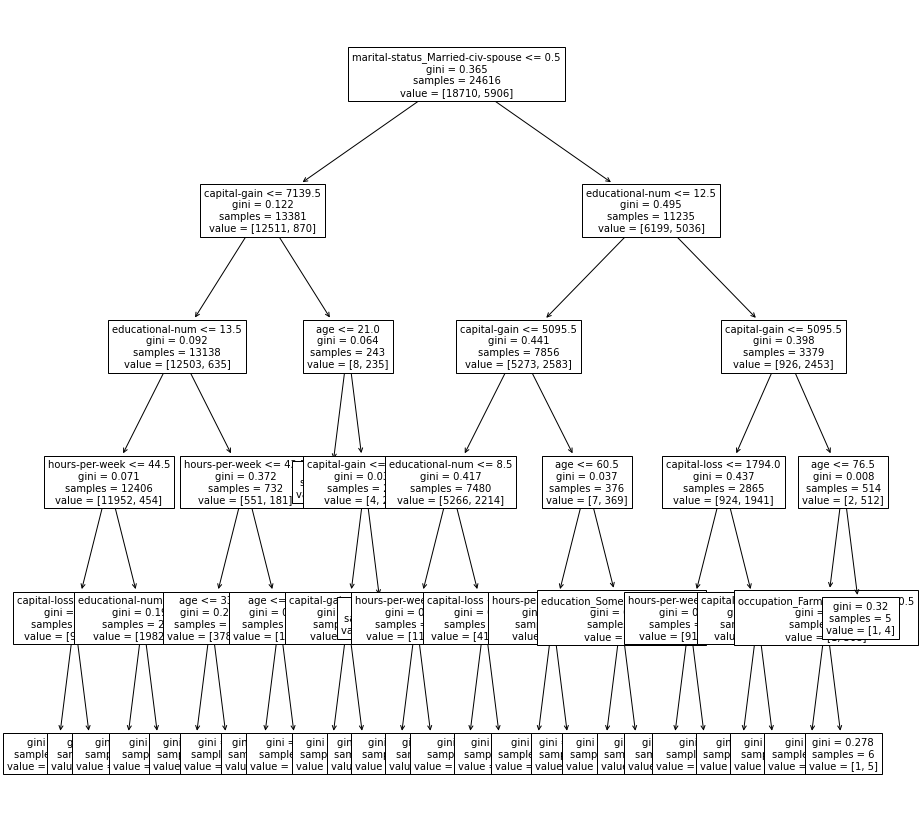

In [18]:
#dibujemos el árbol
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(clf_dt, feature_names=X.columns, fontsize=10)
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = clf_dt, X = X_train, y = y_train, cv = 5)
scores

array([0.85418359, 0.85557587, 0.85191956, 0.84927889, 0.85110705])

In [20]:
scores.mean()

0.8524129927446445